# Tutorial 3b: Quantum State Tomography
MIT 6.S089 Introduction to Quantum Computing - IAP 2023. Notebook developed by Shoumik Chowdhury.

In [2]:
""" Import Relevant Packages """
import qiskit
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex, plot_bloch_multivector
from qiskit_experiments.library import StateTomography
import numpy as np

# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeJakarta

# Noisy simulator backend
sim_backend = AerSimulator()
noisy_backend = AerSimulator.from_backend(FakeJakarta());

## 1. Single Qubit Tomography


### Simulated State Tomography
We first set up an initial state, using the Qiskit `qi.Statevector` class. We then pass that into the `StateTomography` method in Qiskit, to automatically construct the $3^N$ measurement circuits required to do tomography. We then run these circuits, extract the counts, and reconstruct the density matrix.

In [3]:
# Pick an initial state here (e.g. 1 state)
state = qi.Statevector.from_label('1')
ρ = qi.DensityMatrix(state)
ρ.draw('latex')


<IPython.core.display.Latex object>

In [10]:
# QST Experiment: input state, backend, and number of shots

qst = StateTomography(state)
qst_data = qst.run(sim_backend, shots=10000).block_for_results()

In [11]:
for circ in qst.circuits():
    print(circ)

     ┌─────────────────┐ ░ ┌────────────┐ ░ ┌─┐
  q: ┤ Initialize(0,1) ├─░─┤ PauliMeasZ ├─░─┤M├
     └─────────────────┘ ░ └────────────┘ ░ └╥┘
c: 1/════════════════════════════════════════╩═
                                             0 
     ┌─────────────────┐ ░ ┌────────────┐ ░ ┌─┐
  q: ┤ Initialize(0,1) ├─░─┤ PauliMeasX ├─░─┤M├
     └─────────────────┘ ░ └────────────┘ ░ └╥┘
c: 1/════════════════════════════════════════╩═
                                             0 
     ┌─────────────────┐ ░ ┌────────────┐ ░ ┌─┐
  q: ┤ Initialize(0,1) ├─░─┤ PauliMeasY ├─░─┤M├
     └─────────────────┘ ░ └────────────┘ ░ └╥┘
c: 1/════════════════════════════════════════╩═
                                             0 


In [12]:
# Get the estimated state 

ρM = qst_data.analysis_results('state').value
ρM.draw('latex')

<IPython.core.display.Latex object>

Fidelity to target: 0.999891745167479


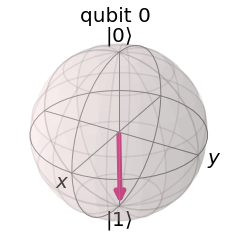

In [13]:
print("Fidelity to target:", qi.state_fidelity(ρ, ρM))
plot_bloch_multivector(ρM)

### Simulated Noisy State Tomography using IBM `Jakarta` Device Profile

In [14]:
# QST Experiment
qst = StateTomography(state)
qst_data = qst.run(noisy_backend, shots=1000).block_for_results()

In [15]:
# Get the estimated state 
ρM = qst_data.analysis_results('state').value
ρM.draw('latex')

<IPython.core.display.Latex object>

Fidelity to target: 0.9329999999999992


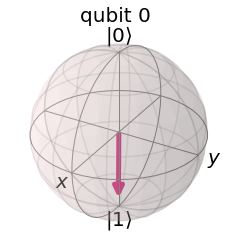

In [16]:
print("Fidelity to target:", qi.state_fidelity(ρ, ρM))
plot_bloch_multivector(ρM)

## 2. Multi-Qubit Tomography
In this example, we can perform state tomography on a 2-qubit state: e.g. the Bell state $|00\rangle + |11\rangle$

In [17]:
# Bell State preparation circuit
nq = 2
qc = qiskit.QuantumCircuit(nq)


#### Insert Bell state circuit here ####
qc.h(0)
qc.cx(0, 1)


In [18]:
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

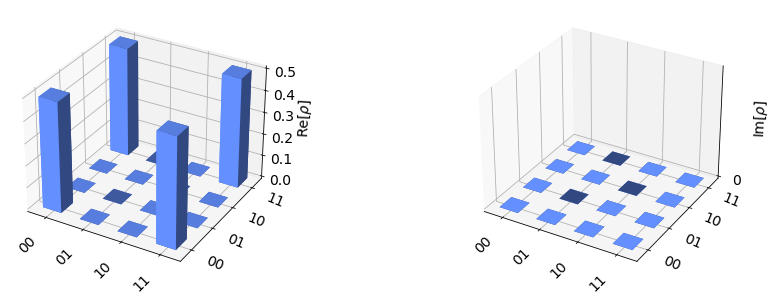

In [19]:
ψ = qi.Statevector(qc)
ρ = qi.DensityMatrix(ψ)
ρ.draw('city')

In [20]:
ψ.draw('latex')

<IPython.core.display.Latex object>

In [21]:
ρ.draw('latex')

<IPython.core.display.Latex object>

In [22]:
# QST Experiment
qst = StateTomography(qc)
qst_data = qst.run(sim_backend, shots=1000).block_for_results()

In [23]:
# Get the estimated state 
ρM = qst_data.analysis_results('state').value
ρM.draw('latex')

<IPython.core.display.Latex object>

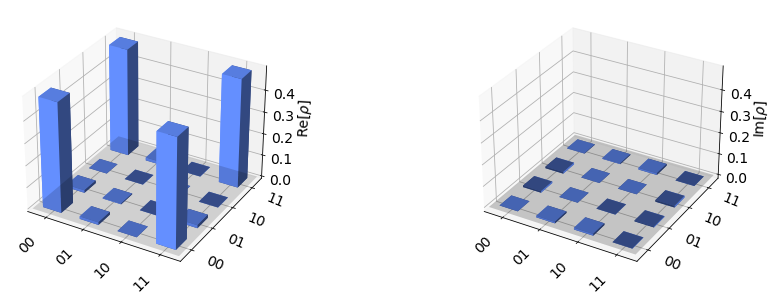

In [24]:
ρM.draw('city')

In [25]:
for circ in qst.circuits():
    print(circ)

     ┌───┐      ░ ┌────────────┐ ░ ┌─┐   
q_0: ┤ H ├──■───░─┤ PauliMeasZ ├─░─┤M├───
     └───┘┌─┴─┐ ░ ├────────────┤ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░─┤ PauliMeasZ ├─░──╫─┤M├
          └───┘ ░ └────────────┘ ░  ║ └╥┘
c: 2/═══════════════════════════════╩══╩═
                                    0  1 
     ┌───┐      ░ ┌────────────┐ ░ ┌─┐   
q_0: ┤ H ├──■───░─┤ PauliMeasZ ├─░─┤M├───
     └───┘┌─┴─┐ ░ ├────────────┤ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░─┤ PauliMeasX ├─░──╫─┤M├
          └───┘ ░ └────────────┘ ░  ║ └╥┘
c: 2/═══════════════════════════════╩══╩═
                                    0  1 
     ┌───┐      ░ ┌────────────┐ ░ ┌─┐   
q_0: ┤ H ├──■───░─┤ PauliMeasZ ├─░─┤M├───
     └───┘┌─┴─┐ ░ ├────────────┤ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░─┤ PauliMeasY ├─░──╫─┤M├
          └───┘ ░ └────────────┘ ░  ║ └╥┘
c: 2/═══════════════════════════════╩══╩═
                                    0  1 
     ┌───┐      ░ ┌────────────┐ ░ ┌─┐   
q_0: ┤ H ├──■───░─┤ PauliMeasX ├─░─┤M├───
     └───┘┌─┴─┐ ░ ├────────────┤ ░